# **Introduction**

In this notebook, we explore several datasets related to books, tags, and user ratings. We will also parse an XML file to extract additional book metadata.

### Outline:
1. Environment Setup (Imports)
2. Reading CSV Data
3. Exploratory Data Analysis
4. XML Parsing
5. Visualization


# **Environment Setup**

Here we import the necessary libraries:
- pandas for data manipulation
- matplotlib.pyplot for plotting
- xml.etree.ElementTree for parsing XML
- os for file path handling

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import os

# Define the data directory path
data_dir = os.path.join('..', 'data', 'raw')

# **Reading CSV Data**

We'll load the following CSV files from the data/raw directory:
- `books.csv`
- `tags.csv`
- `book_tags.csv`
- `ratings.csv`
- `to_read.csv`


In [33]:
# Read the CSV files from the data/raw directory
books_df = pd.read_csv(os.path.join(data_dir, 'books.csv'))
tags_df = pd.read_csv(os.path.join(data_dir, 'tags.csv'))
book_tags_df = pd.read_csv(os.path.join(data_dir, 'book_tags.csv'))
ratings_df = pd.read_csv(os.path.join(data_dir, 'ratings.csv'))
to_read_df = pd.read_csv(os.path.join(data_dir, 'to_read.csv'))




In [34]:
books_df.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m/2767052.jpg,https://images.gr-assets.com/books/1447303603s/2767052.jpg
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m/3.jpg,https://images.gr-assets.com/books/1474154022s/3.jpg
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m/41865.jpg,https://images.gr-assets.com/books/1361039443s/41865.jpg
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m/2657.jpg,https://images.gr-assets.com/books/1361975680s/2657.jpg
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m/4671.jpg,https://images.gr-assets.com/books/1490528560s/4671.jpg


In [35]:
# Check missing values in the books_df dataset
print("Missing values in each column of books_df:")
print(books_df.isnull().sum())

# Get total number of missing values
total_missing = books_df.isnull().sum().sum()
print(f"\nTotal number of missing values: {total_missing}")

# Calculate percentage of missing values
percent_missing = (total_missing / (books_df.shape[0] * books_df.shape[1])) * 100
print(f"Percentage of missing values: {percent_missing:.2f}%")


Missing values in each column of books_df:
id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

Total number of missing values: 2975
Percentage of missing values: 1.29%


In [36]:
tags_df.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [37]:
# Check structure and missing values in tags_df
print("Missing values in each column of tags_df:")
print(tags_df.isnull().sum())

# Check value counts for tag_name to see distribution
print("\nTop 10 most common tags:")
print(tags_df['tag_name'].value_counts().head(10))

# Check if there are duplicate tag_ids (which should be unique identifiers)
duplicate_tag_ids = tags_df['tag_id'].duplicated().sum()
print(f"\nNumber of duplicate tag IDs: {duplicate_tag_ids}")

# Check for unusual or empty tag names
empty_tags = tags_df[tags_df['tag_name'].str.strip() == ''].shape[0]
print(f"Number of empty tag names: {empty_tags}")

# Get statistics about tag name length
tag_name_lengths = tags_df['tag_name'].str.len()
print("\nTag name length statistics:")
print(f"Min length: {tag_name_lengths.min()}")
print(f"Max length: {tag_name_lengths.max()}")
print(f"Average length: {tag_name_lengths.mean():.2f}")

Missing values in each column of tags_df:
tag_id      0
tag_name    0
dtype: int64

Top 10 most common tags:
tag_name
ｆａｖｏｕｒｉｔｅｓ    1
-             1
--1-          1
--10-         1
--12-         1
--122-        1
--166-        1
--17-         1
--19-         1
--2-          1
Name: count, dtype: int64

Number of duplicate tag IDs: 0
Number of empty tag names: 0

Tag name length statistics:
Min length: 1
Max length: 35
Average length: 13.15


In [38]:
book_tags_df.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [39]:
# Check structure and missing values in book_tags_df
print("Missing values in each column of book_tags_df:")
print(book_tags_df.isnull().sum())

# Get total number of missing values
total_missing_tags = book_tags_df.isnull().sum().sum()
print(f"\nTotal number of missing values: {total_missing_tags}")

# Calculate percentage of missing values
percent_missing_tags = (total_missing_tags / (book_tags_df.shape[0] * book_tags_df.shape[1])) * 100
print(f"Percentage of missing values: {percent_missing_tags:.2f}%")

# Additional analysis specific to book_tags_df
print("\nDistribution of tag counts:")
print(book_tags_df['count'].describe())

# Find top books with most tags
top_books_by_tags = book_tags_df.groupby('goodreads_book_id').size().sort_values(ascending=False).head(10)
print("\nTop 10 books with most tags:")
print(top_books_by_tags)

# Find top tags by usage
top_tags = book_tags_df.groupby('tag_id').size().sort_values(ascending=False).head(10)
print("\nTop 10 most used tag IDs:")
print(top_tags)

Missing values in each column of book_tags_df:
goodreads_book_id    0
tag_id               0
count                0
dtype: int64

Total number of missing values: 0
Percentage of missing values: 0.00%

Distribution of tag counts:
count    999912.000000
mean        208.869633
std        3501.265173
min          -1.000000
25%           7.000000
50%          15.000000
75%          40.000000
max      596234.000000
Name: count, dtype: float64

Top 10 books with most tags:
goodreads_book_id
30253700    100
30226723    100
30065028    100
30008702    100
30002998    100
29991719    100
29981261    100
29975458    100
29925715    100
29906980    100
dtype: int64

Top 10 most used tag IDs:
tag_id
30574    9983
11557    9881
22743    9858
5207     9799
8717     9776
18045    9415
22753    9221
11743    9097
30521    8692
17213    8316
dtype: int64


In [40]:
ratings_df.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [41]:
to_read_df.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


# **Exploratory Data Analysis**



In [42]:
# 2. Merge ratings with books so that you have the title for each book
merged_ratings = pd.merge(ratings_df, books_df, on="book_id", how="inner")

In [43]:
# Create merged_tags DataFrame by joining book_tags_df with tags_df
merged_tags = pd.merge(
    book_tags_df,
    tags_df,
    on='tag_id',
    how='inner'
)

# First, let's check the column names in each DataFrame
print("Books DataFrame columns:", books_df.columns.tolist())
print("Merged Tags DataFrame columns:", merged_tags.columns.tolist())

# Merge books with tags using goodreads_book_id column
books_with_tags = pd.merge(
    books_df, 
    merged_tags, 
    left_on='id',  # 'id' in books_df corresponds to goodreads_book_id in merged_tags
    right_on='goodreads_book_id',
    how='left'
)

Books DataFrame columns: ['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year', 'original_title', 'title', 'language_code', 'average_rating', 'ratings_count', 'work_ratings_count', 'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url', 'small_image_url']
Merged Tags DataFrame columns: ['goodreads_book_id', 'tag_id', 'count', 'tag_name']


In [44]:
# 4. Filter the merged ratings data:
#    (a) Keep only reviews in English if needed (using a language detection function, for example)
#    (b) Keep only books that have at least 2 ratings and users who have rated at least 10 books.

# Filter books with at least 2 ratings:
book_counts = merged_ratings['book_id'].value_counts()
valid_books = book_counts[book_counts >= 2].index
merged_ratings = merged_ratings[merged_ratings['book_id'].isin(valid_books)]

# Filter users who rated at least 10 books:
user_counts = merged_ratings['user_id'].value_counts()
valid_users = user_counts[user_counts >= 10].index
merged_ratings = merged_ratings[merged_ratings['user_id'].isin(valid_users)]

In [45]:
# 5. Now, the resulting merged_ratings DataFrame contains the columns you're interested in,
#    such as: user_id, title, and rating.
print(merged_ratings[[ 'title','user_id', 'rating']].head(10))

                                                       title  user_id  rating
0  Harry Potter and the Half-Blood Prince (Harry Potter, #6)      314       5
1  Harry Potter and the Half-Blood Prince (Harry Potter, #6)      439       3
2  Harry Potter and the Half-Blood Prince (Harry Potter, #6)      588       5
3  Harry Potter and the Half-Blood Prince (Harry Potter, #6)     1169       4
4  Harry Potter and the Half-Blood Prince (Harry Potter, #6)     1185       4
5  Harry Potter and the Half-Blood Prince (Harry Potter, #6)     2077       4
6  Harry Potter and the Half-Blood Prince (Harry Potter, #6)     2487       4
7  Harry Potter and the Half-Blood Prince (Harry Potter, #6)     2900       5
8  Harry Potter and the Half-Blood Prince (Harry Potter, #6)     3662       4
9  Harry Potter and the Half-Blood Prince (Harry Potter, #6)     3922       5


# **Visualization**

Here we create a simple bar chart to visualize the distribution of ratings.


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import os

# Define the data directory path
data_dir = os.path.join('..', 'data', 'raw')

# Read the CSV files from the data/raw directory
books_df = pd.read_csv(os.path.join(data_dir, 'books.csv'))
tags_df = pd.read_csv(os.path.join(data_dir, 'tags.csv'))
book_tags_df = pd.read_csv(os.path.join(data_dir, 'book_tags.csv'))
ratings_df = pd.read_csv(os.path.join(data_dir, 'ratings.csv'))
to_read_df = pd.read_csv(os.path.join(data_dir, 'to_read.csv'))

# Check the rating distribution to see if there are any ratings with value 0
print("Rating value counts:")
print(ratings_df['rating'].value_counts().sort_index())
print("\nMinimum rating value:", ratings_df['rating'].min())
print("Maximum rating value:", ratings_df['rating'].max())
print("\nNote: There is no rating 0 because Goodreads uses a 1-5 star rating system")

Rating value counts:
rating
1     19575
2     63231
3    248623
4    357366
5    292961
Name: count, dtype: int64

Minimum rating value: 1
Maximum rating value: 5

Note: There is no rating 0 because Goodreads uses a 1-5 star rating system


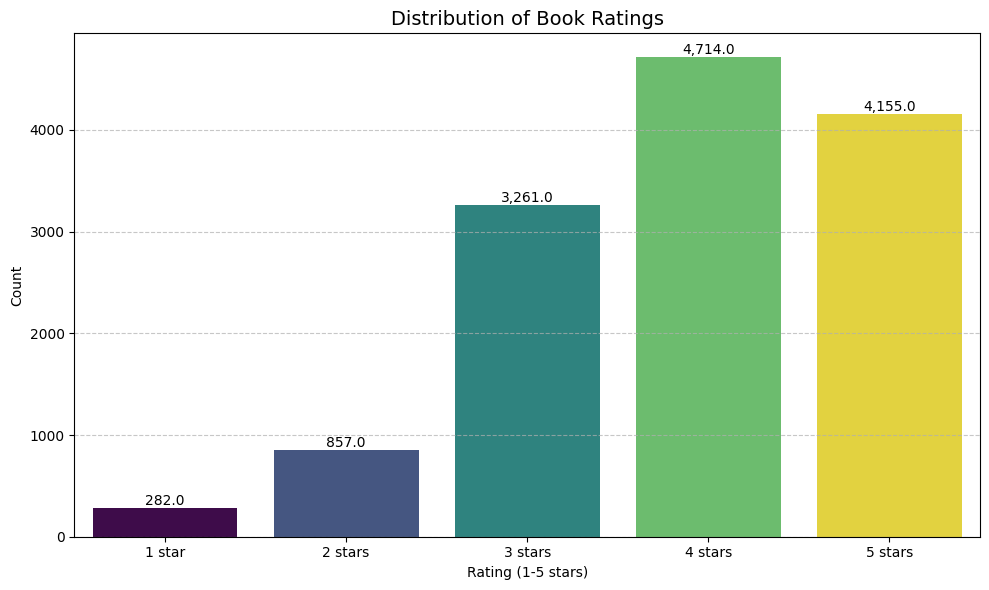

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=merged_ratings, hue='rating', palette='viridis', legend=False)
plt.title('Distribution of Book Ratings', fontsize=14)
plt.xlabel('Rating (1-5 stars)')
plt.ylabel('Count')
plt.xticks(range(5), ['1 star', '2 stars', '3 stars', '4 stars', '5 stars'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

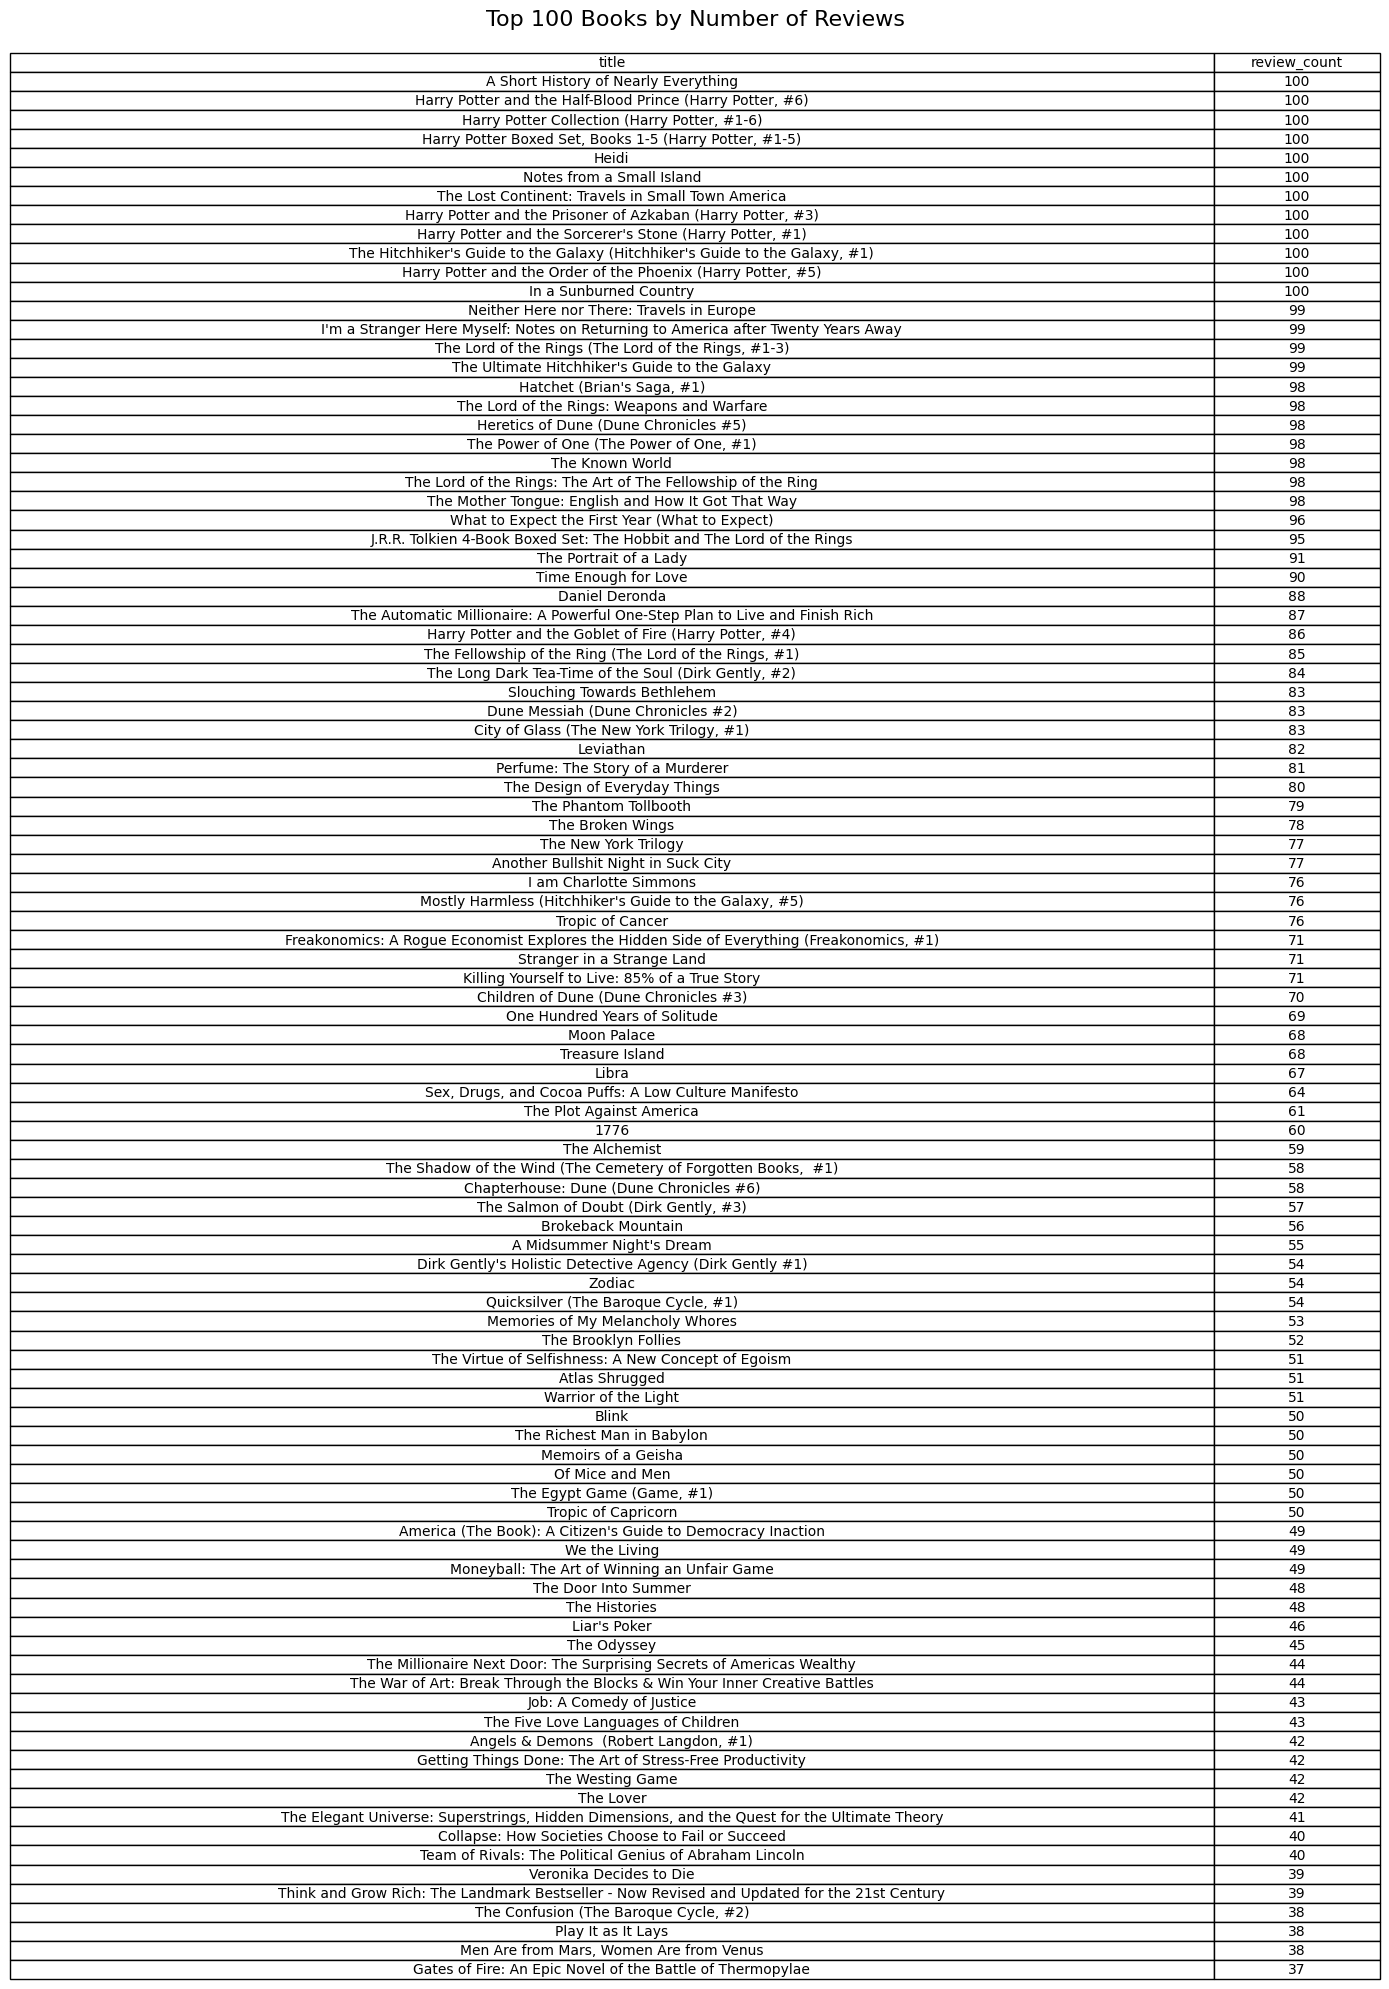

In [48]:
# Create a DataFrame with the number of reviews per book
book_reviews_count = merged_ratings.groupby('title').size().reset_index(name='review_count')

# Sort by review count in descending order and get the top 100
top_100_books_by_reviews = book_reviews_count.sort_values('review_count', ascending=False).head(100)

# Display the table with proper formatting
plt.figure(figsize=(14, 20))
plt.axis('off')
table = plt.table(
    cellText=top_100_books_by_reviews.values,
    colLabels=top_100_books_by_reviews.columns,
    cellLoc='center',
    loc='center',
    bbox=[0, 0, 1, 1]
)

# Adjust table appearance
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Set column widths
table.auto_set_column_width([0, 1])

plt.title('Top 100 Books by Number of Reviews', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

C:\Users\peppe\AppData\Local\Temp\ipykernel_61920\199477524.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='rating', y='title', data=top_books, palette='viridis')


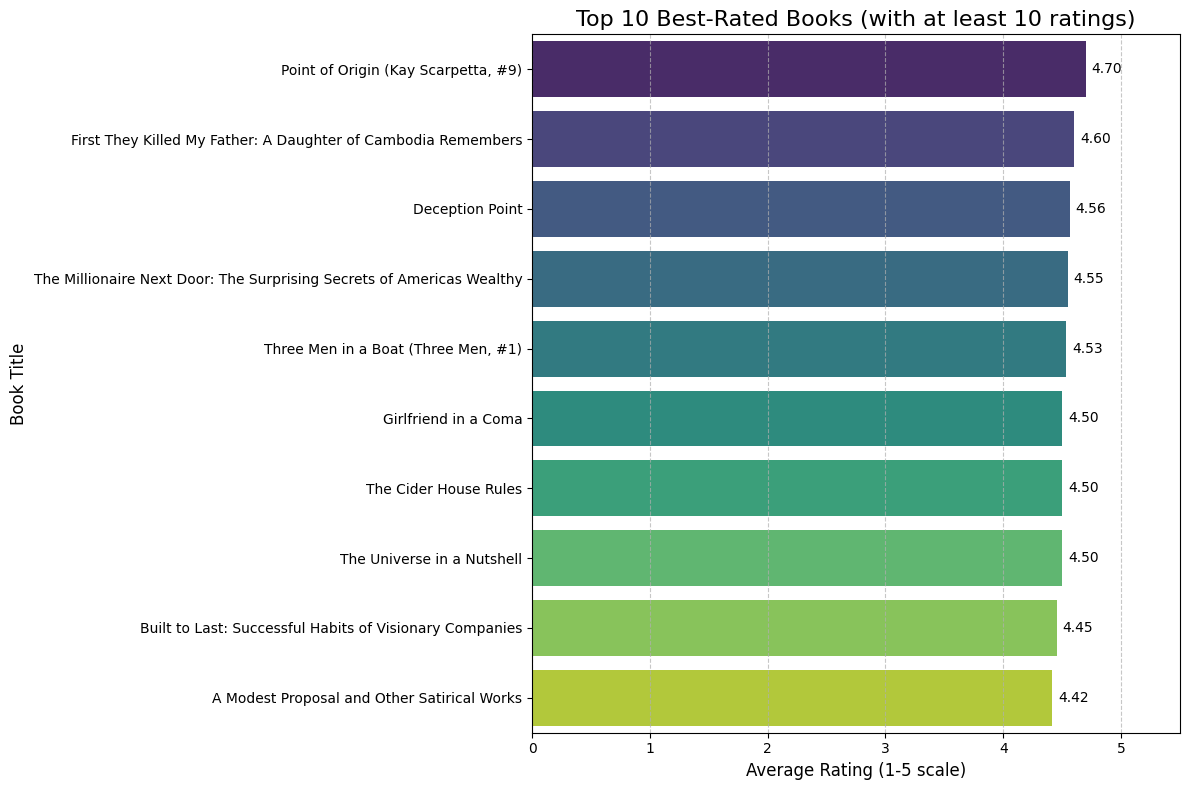

In [50]:
# Create a DataFrame with average ratings by book title
book_avg_ratings = merged_ratings.groupby('title')['rating'].mean().reset_index()

# First, get the count of ratings for each book
book_rating_counts = merged_ratings.groupby('title')['rating'].count().reset_index(name='count')

# Merge with average ratings
book_stats = pd.merge(book_avg_ratings, book_rating_counts, on='title')

# Filter for books with at least 10 ratings
books_with_enough_ratings = book_stats[book_stats['count'] >= 10]

# Sort by average rating in descending order
top_books = books_with_enough_ratings.sort_values(by='rating', ascending=False).head(10)

# Create horizontal bar chart for better readability of book titles
plt.figure(figsize=(12, 8))
bars = sns.barplot(x='rating', y='title', data=top_books, palette='viridis')

# Add value labels to the bars
for i, v in enumerate(top_books['rating']):
    plt.text(v + 0.05, i, f"{v:.2f}", va='center')

# Customize the plot
plt.title('Top 10 Best-Rated Books (with at least 10 ratings)', fontsize=16)
plt.xlabel('Average Rating (1-5 scale)', fontsize=12)
plt.ylabel('Book Title', fontsize=12)
plt.xlim(0, 5.5)  # Set x-axis limit to accommodate the labels
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

C:\Users\peppe\AppData\Local\Temp\ipykernel_61920\582636341.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='bayesian_avg', y='title', data=top_books_bayesian, palette='viridis')


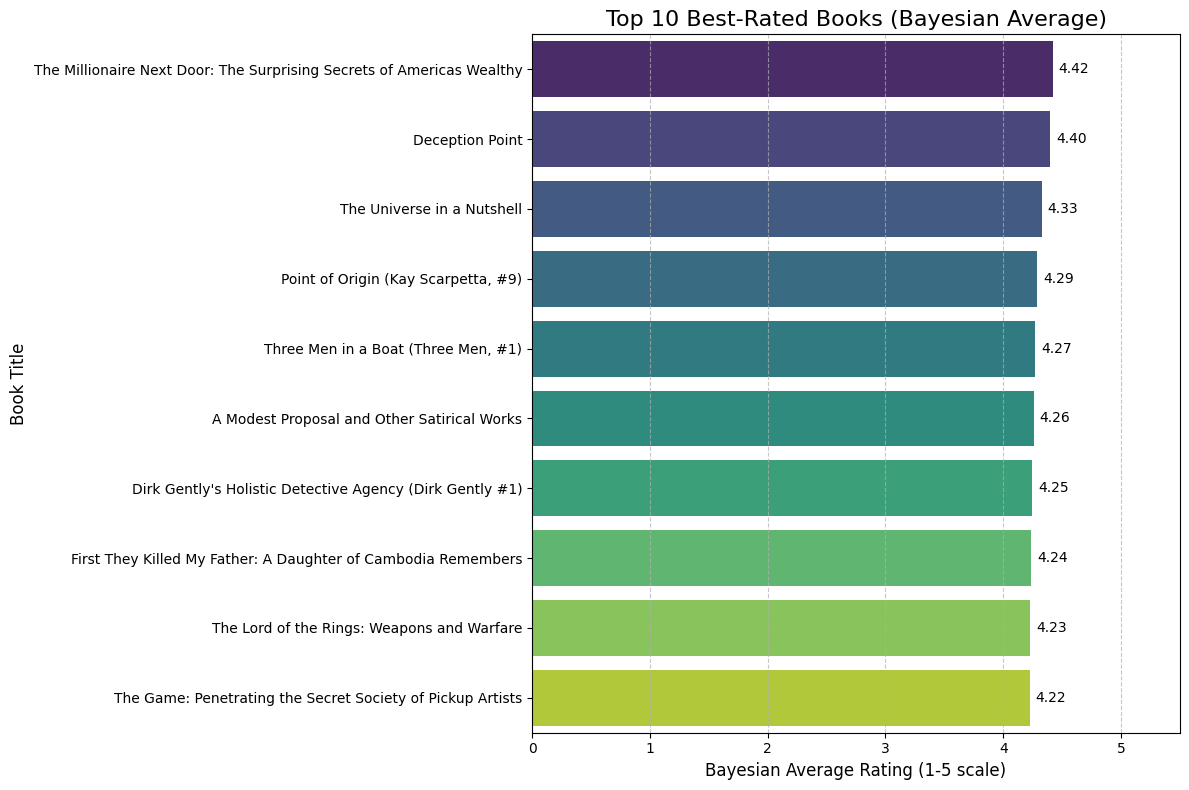

In [52]:
# Calculate Bayesian average ratings for books
# Define global mean rating and minimum votes required
global_avg_rating = merged_ratings['rating'].mean()
min_votes_required = 10

# First, create book_stats DataFrame by merging average ratings with counts
book_avg_ratings = merged_ratings.groupby('title')['rating'].mean().reset_index()
book_rating_counts = merged_ratings.groupby('title')['rating'].count().reset_index(name='count')
book_stats = pd.merge(book_avg_ratings, book_rating_counts, on='title')

# Calculate Bayesian average
def bayesian_avg(ratings, counts, C=min_votes_required, m=global_avg_rating):
    """
    Calculate Bayesian average where:
    - ratings: the average rating for each book
    - counts: the number of ratings for each book
    - C: minimum votes required (acts as a prior weight)
    - m: prior mean (global average rating)
    """
    return (counts * ratings + C * m) / (counts + C)

# Add Bayesian average to the dataframe
book_stats['bayesian_avg'] = bayesian_avg(book_stats['rating'], book_stats['count'])

# Filter for books with at least 10 ratings as before
books_with_enough_ratings = book_stats[book_stats['count'] >= 10]

# Sort by Bayesian average in descending order
top_books_bayesian = books_with_enough_ratings.sort_values(by='bayesian_avg', ascending=False).head(10)

# Create horizontal bar chart for better readability of book titles
plt.figure(figsize=(12, 8))
bars = sns.barplot(x='bayesian_avg', y='title', data=top_books_bayesian, palette='viridis')

# Add value labels to the bars
for i, v in enumerate(top_books_bayesian['bayesian_avg']):
    plt.text(v + 0.05, i, f"{v:.2f}", va='center')

# Customize the plot
plt.title('Top 10 Best-Rated Books (Bayesian Average)', fontsize=16)
plt.xlabel('Bayesian Average Rating (1-5 scale)', fontsize=12)
plt.ylabel('Book Title', fontsize=12)
plt.xlim(0, 5.5)  # Set x-axis limit to accommodate the labels
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

# Implementation


In [53]:
# Solution 

n_users = merged_ratings['user_id'].nunique()

n_books = merged_ratings['title'].nunique()

print("Number of users: ", n_users)

print("Number of books: ", n_books)

Number of users:  949
Number of books:  761


In [55]:
# Create the pivot table matrix for user-item ratings
mat_ratings = merged_ratings.pivot_table(
    index='user_id',
    columns='title',
    values='rating'
)

# Display the first 10 rows of the ratings matrix
mat_ratings.head(10)

title,"'Tis (Frank McCourt, #2)",1421: The Year China Discovered America,1776,1984,A Bend in the River,A Bend in the Road,A Brief History of Time,A Briefer History of Time,A Case of Need,A Christmas Carol,...,"Wolves of the Calla (The Dark Tower, #5)","Women in Love (Brangwen Family, #2)",World War Z: An Oral History of the Zombie War,"World Without End (The Kingsbridge Series, #2)",Wuthering Heights,"Xenocide (Ender's Saga, #3)",Year of Wonders,You Shall Know Our Velocity!,Zen and the Art of Motorcycle Maintenance: An Inquiry Into Values,Zodiac
user_id,,,,,,,,,,,,,,,,,,,,,
173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# (k) Replace missing values ​​with zeros.

mat_ratings.fillna(0, inplace=True)

mat_ratings

title,"'Tis (Frank McCourt, #2)",1421: The Year China Discovered America,1776,1984,A Bend in the River,A Bend in the Road,A Brief History of Time,A Briefer History of Time,A Case of Need,A Christmas Carol,...,"Wolves of the Calla (The Dark Tower, #5)","Women in Love (Brangwen Family, #2)",World War Z: An Oral History of the Zombie War,"World Without End (The Kingsbridge Series, #2)",Wuthering Heights,"Xenocide (Ender's Saga, #3)",Year of Wonders,You Shall Know Our Velocity!,Zen and the Art of Motorcycle Maintenance: An Inquiry Into Values,Zodiac
user_id,,,,,,,,,,,,,,,,,,,,,
173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
363,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53173,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
'''Note that the rating matrix is very large and contains many missing values. This can be heavy in terms of storage and slow down calculations.

Indeed, most of the entries in this matrix are not observed, because a given user only reads and rates a small number of books compared to the total number of books in the dataset.

These matrices containing a large number of zero values ​​are called sparse matrices or sparse matrix in English.

When working with sparse matrices, it is then interesting to use a CSR (Compressed Sparse Row) format.

The CSR format only stores non-zero elements of the matrix with their column indices and row pointers. This results in significantly less memory usage.

(l) Store in a sparse_ratings variable the mat_ratings matrix in CSR format. We will also store user IDs and book titles in variables named user_ids and titles, respectively. This will be useful to us later.
'''
# Solution
from scipy.sparse import csr_matrix

# Convert the 'mat_ratings' rating matrix to a 'sparse_ratings' sparse matrix.
sparse_ratings = csr_matrix(mat_ratings)

# Extract user IDs and book titles from the ratings matrix.
user_ids = mat_ratings.index.tolist()  
titles = mat_ratings.columns.tolist()  

# Show sparse matrix 'sparse_ratings'.
print(sparse_ratings)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13243 stored elements and shape (949, 761)>
  Coords	Values
  (0, 111)	5.0
  (0, 153)	2.0
  (0, 188)	5.0
  (0, 222)	5.0
  (0, 320)	4.0
  (0, 369)	5.0
  (0, 489)	4.0
  (0, 514)	2.0
  (0, 531)	1.0
  (0, 581)	3.0
  (0, 706)	4.0
  (0, 707)	4.0
  (1, 123)	5.0
  (1, 130)	4.0
  (1, 221)	5.0
  (1, 285)	5.0
  (1, 318)	5.0
  (1, 420)	5.0
  (1, 433)	4.0
  (1, 489)	4.0
  (1, 517)	4.0
  (1, 676)	5.0
  (1, 706)	5.0
  (2, 20)	5.0
  (2, 24)	5.0
  :	:
  (947, 437)	5.0
  (947, 448)	5.0
  (947, 471)	5.0
  (947, 581)	5.0
  (947, 587)	5.0
  (947, 588)	5.0
  (947, 589)	5.0
  (947, 605)	5.0
  (947, 710)	5.0
  (948, 48)	5.0
  (948, 64)	5.0
  (948, 69)	5.0
  (948, 112)	5.0
  (948, 123)	5.0
  (948, 131)	5.0
  (948, 260)	5.0
  (948, 293)	5.0
  (948, 295)	5.0
  (948, 341)	5.0
  (948, 427)	5.0
  (948, 461)	5.0
  (948, 471)	5.0
  (948, 526)	5.0
  (948, 627)	5.0
  (948, 737)	5.0


# User-based filtering

In [59]:
# Solution

import numpy as np

# Definition of a function 'sim_cos' to calculate the cosine similarity between two vectors 'x' and 'y'.
def sim_cos(x, y):
    # Calculation of the scalar product between the vectors 'x' and 'y'.
    dot_product = np.dot(x, y)
    
    # Calculation of Euclidean norms of 'x' and 'y'.
    norm_x = np.sqrt(np.sum(x ** 2))
    norm_y = np.sqrt(np.sum(y ** 2))
    
    # Checking if one of the standards is zero to avoid division by zero.
    if norm_x == 0 or norm_y == 0:
        return 0
    
    # Calculation of cosine similarity using the formula.
    similarity = dot_product / (norm_x * norm_y)
    return similarity

In [63]:
# Solution

# Get preferences for two specific users from the ratings matrix matrix
pref_1 = mat_ratings.loc[173, :].values

pref_2 = mat_ratings.loc[274, :].values

similarity = sim_cos(pref_1, pref_2)


print("The similarity between the two users is ", similarity)

The similarity between the two users is  0.1726107566437204


In [65]:
# The cosine_similarity function from the sklearn.metrics.pairwise library allows you to calculate cosine similarity. It has the advantage of being able to be applied to a CSR matrix.
import sklearn.metrics.pairwise as dist

# Using the 'cosine_similarity' function of the 'dist' module to calculate the cosine similarity between users.
user_similarity = dist.cosine_similarity(sparse_ratings)

# Creation of a pandas DataFrame from the similarity matrix between users.
# The indexes and columns of the DataFrame are the user identifiers.
user_similarity = pd.DataFrame(user_similarity, index=user_ids, columns=user_ids)

In [66]:
#Complete the function pred_user which, given a user, returns the predicted grades of all the books he has not read. It takes as argument mat_ratings which corresponds to the ratings matrix, user_similarity the similarity matrix associated with the users, k the number of similar neighbors that we want to take taken into account and user_id the id of the user on whom we wish to make the predictions.
def pred_user(mat_ratings, user_similarity, k, user_id):

    # Select in mat_ratings the books that have not yet been read by the user
    to_predict = mat_ratings.loc[user_id][mat_ratings.loc[user_id]==0]

    # Select the k most similar users excluding the user itself
    similar_users = user_similarity.loc[user_id].sort_values(ascending=False)[1:k+1]
    
    # Calculation of the denominator
    norm = np.sum(np.abs(similar_users))

    for i in to_predict.index:
        # Retrieve similar user ratings associated with the movie i
        ratings = mat_ratings[i].loc[similar_users.index]
        
        # Calculate the dot product between ratings and similar_users
        scalar_prod = np.dot(ratings, similar_users)
        
        #Calculate predicted rating for movie i
        pred = scalar_prod / norm

        # Replace with prediction
        to_predict[i] = pred

    return to_predict

In [70]:
# Top ratings from user '273'
userId = 274
user_preferences = merged_ratings[(merged_ratings['user_id']==userId) & (merged_ratings['rating']>=2)]
user_preferences_sorted = user_preferences.sort_values('rating', ascending=False).drop_duplicates()
top_user_preferences = user_preferences_sorted.head(10)
top_user_preferences

,book_id,user_id,rating,id,best_book_id,work_id,books_count,isbn,isbn13,authors,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
3102,249,274,5,1999,249,543143,205,802131786,9.780802e+12,Henry Miller,...,45518,49701,2526,2313,4591,12278,16494,14025,https://images.gr-assets.com/books/1408753140m/249.jpg,https://images.gr-assets.com/books/1408753140s/249.jpg
6100,597,274,5,3598,597,2226163,25,743264460,9.780743e+12,Chuck Klosterman,...,23015,23614,1108,457,1414,5826,9442,6475,https://s.gr-assets.com/assets/nophoto/book/111x148-bcc0...,https://s.gr-assets.com/assets/nophoto/book/50x75-a91bf2...
6200,599,274,5,1392,599,929649,16,743236017,9.780743e+12,Chuck Klosterman,...,56548,57867,3344,1756,4741,14755,21605,15010,https://images.gr-assets.com/books/1380742001m/599.jpg,https://images.gr-assets.com/books/1380742001s/599.jpg
33166,4516,274,5,5022,4516,1882717,106,8423648990,9.788424e+12,Carlos Ruiz Zafón,...,18260,24929,1976,304,1299,5383,9274,8669,https://s.gr-assets.com/assets/nophoto/book/111x148-bcc0...,https://s.gr-assets.com/assets/nophoto/book/50x75-a91bf2...
11700,1319,274,5,2867,1319,722104,29,446691437,9.780447e+12,"Steven Pressfield, Robert McKee",...,31399,37038,3578,992,2088,6294,11688,15976,https://s.gr-assets.com/assets/nophoto/book/111x148-bcc0...,https://s.gr-assets.com/assets/nophoto/book/50x75-a91bf2...
23795,3388,274,5,1458,3388,2771048,105,067976397X,9.780680e+12,Louis de Bernières,...,57583,65596,2279,1734,4029,13185,23679,22969,https://images.gr-assets.com/books/1479680795m/3388.jpg,https://images.gr-assets.com/books/1479680795s/3388.jpg
15900,2002,274,5,9048,2002,8621948,5,043932162X,9.780439e+12,J.K. Rowling,...,10736,11732,185,106,304,1548,2595,7179,https://images.gr-assets.com/books/1479775271m/2002.jpg,https://images.gr-assets.com/books/1479775271s/2002.jpg
3502,291,274,4,7242,291,1676536,119,806501901,9.780807e+12,"Kahlil Gibran, Anthony R. Ferris",...,5611,12435,1425,272,792,2796,4251,4324,https://s.gr-assets.com/assets/nophoto/book/111x148-bcc0...,https://s.gr-assets.com/assets/nophoto/book/50x75-a91bf2...
7701,816,274,4,1142,816,1166797,3,60512806,9.780061e+12,Neal Stephenson,...,72683,81409,4342,1223,2983,10487,26399,40317,https://images.gr-assets.com/books/1327931476m/816.jpg,https://images.gr-assets.com/books/1327931476s/816.jpg
8300,840,274,4,6937,840,18518,38,465067107,9.780465e+12,Donald A. Norman,...,11838,15202,1192,88,483,2327,6020,6284,https://s.gr-assets.com/assets/nophoto/book/111x148-bcc0...,https://s.gr-assets.com/assets/nophoto/book/50x75-a91bf2...


In [71]:
reco_user = pred_user(mat_ratings, user_similarity, 3,274).sort_values(ascending=False).head(10)

print(reco_user)

title
The Phantom Tollbooth                                          2.382847
Men Are from Mars, Women Are from Venus                        1.711670
Blink                                                          1.711670
All the King's Men                                             1.711670
Them: Adventures with Extremists                               1.689184
America (The Book): A Citizen's Guide to Democracy Inaction    1.369336
The Adventures of Sherlock Holmes                              1.369336
Moon Palace                                                    1.351347
Three Weeks With My Brother                                    1.351347
The Westing Game                                               1.279317
Name: 274, dtype: float64


# Item based filtering

In this approach we do not measure the correlation between users but between the content (books). The goal is to find content similar to books that the target user really liked and recommend it to them. We will also use cosine similarity.

 The main difference between content-based filtering and collaborative filtering based on content similarity is that for the former we make recommendations based on the intrinsic characteristics of our content, for example in this context characteristics such as the genre of the books, the author, etc. Whereas for collaborative filtering we use ratings only and rely on books whose ratings are correlated with each other to make recommendations.

In [72]:
# Solution 
item_similarity = dist.cosine_similarity(sparse_ratings.T)

item_similarity = pd.DataFrame(item_similarity, index = titles, columns = titles)

In [73]:
def pred_item(mat_ratings, item_similarity, k, user_id):

    # Select in mat_ratings the books that have not yet been read by the user
    to_predict = mat_ratings.loc[user_id][mat_ratings.loc[user_id]==0]
    
    # Iterate over all these books
    for i in to_predict.index:

        #Find the k most similar books excluding the book itself
        similar_items = item_similarity.loc[i].sort_values(ascending=False)[1:k+1]

        # Calculation of the norm of the similar_items vector
        norm = np.sum(np.abs(similar_items))

        # Retrieve the ratings given by the user to the k nearest neighbors
        ratings = mat_ratings[similar_items.index].loc[user_id]


        # Calculate the dot product between ratings and similar_items
        scalar_prod = np.dot(ratings, similar_items)
        
        #Calculate predicted rating for movie i
        pred = scalar_prod / norm

        # Replace with prediction
        to_predict[i] = pred


    return to_predict

In [74]:
reco_item = pred_item(mat_ratings, item_similarity, 3, 274).sort_values(ascending=False).head(10)

print(reco_item)

title
My Name is Red                                                 2.263781
Sherlock Holmes: The Complete Novels and Stories, Volume I     1.854847
Memories of My Melancholy Whores                               1.764511
The Ground Beneath Her Feet                                    1.694620
Blink                                                          1.691472
City of Glass (The New York Trilogy, #1)                       1.533296
America (The Book): A Citizen's Guide to Democracy Inaction    1.480671
Libra                                                          1.428757
One Hundred Years of Solitude                                  1.395658
Ilium (Ilium, #1)                                              1.386052
Name: 274, dtype: float64
